A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

* Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.

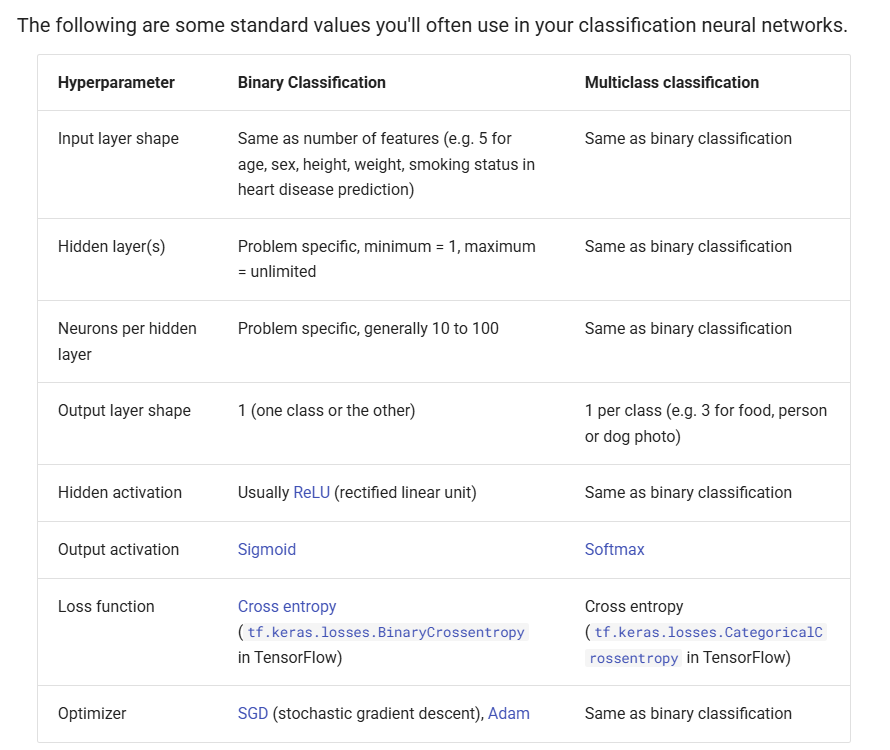

In [1]:
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.19.0


In [2]:
import datetime
print(f"Current data and time :",datetime.datetime.now())

Current data and time : 2025-07-18 01:27:29.467343


Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles
n_samples = 1000

X,y=make_circles(n_samples=n_samples, noise=0.03, factor=0.5)


In [4]:
X

array([[-0.41546347, -0.27840364],
       [-0.72994288, -0.72818296],
       [-0.49675125, -0.03274893],
       ...,
       [ 0.10977378, -1.03619327],
       [-0.39554277, -0.25057734],
       [-0.13506805,  0.51334032]])

In [5]:
y

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

In [6]:
X[:10]

array([[-0.41546347, -0.27840364],
       [-0.72994288, -0.72818296],
       [-0.49675125, -0.03274893],
       [ 0.05080227, -0.48281574],
       [-0.37497353,  0.92337658],
       [ 0.55891636,  0.80708662],
       [-0.01154197, -1.05350576],
       [-0.51382567,  0.87030794],
       [ 0.26958826,  0.41357259],
       [-0.20681865, -0.4270874 ]])

In [7]:
y[:10]

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [8]:
# make a dataframe
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "y":y})
circles

,X1,X2,y
0,-0.415463,-0.278404,1
1,-0.729943,-0.728183,0
2,-0.496751,-0.032749,1
3,0.050802,-0.482816,1
4,-0.374974,0.923377,0
...,...,...,...
995,-0.987242,-0.211061,0
996,-0.050162,0.989930,0
997,0.109774,-1.036193,0
998,-0.395543,-0.250577,1


In [9]:
circles.head()

,X1,X2,y
0,-0.415463,-0.278404,1
1,-0.729943,-0.728183,0
2,-0.496751,-0.032749,1
3,0.050802,-0.482816,1
4,-0.374974,0.923377,0


In [10]:
circles.y.value_counts()

y
1    500
0    500
Name: count, dtype: int64

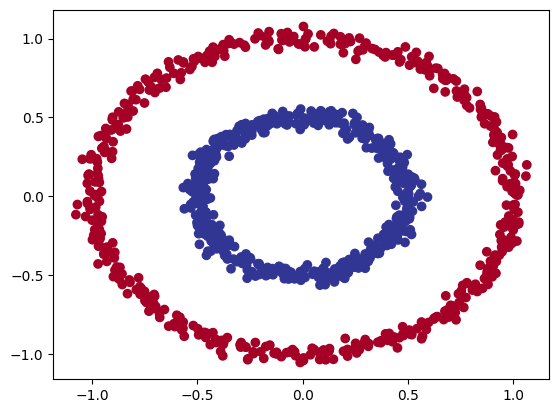

In [11]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

Input shape and output shape

In [12]:
X.shape, y.shape


((1000, 2), (1000,))

In [13]:
len(X),len(y)

(1000, 1000)

Steps in Modelling

In tensorflow, there are typically 3 fundamentals steps to creating and training a model

1. Creating a model :  piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
2. Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. Fitting a model - letting the model try to find patterns in the data (how does X get to y)

In [14]:
tf.random.set_seed(42)

# create a model using a sequential API
# a sequential API is a linear stack of layers
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)
                

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4415 - loss: 2.1030  
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4437 - loss: 0.7157 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4691 - loss: 0.7034 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - loss: 0.6984 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4839 - loss: 0.6961 


In [15]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [16]:
model_1.fit(X,y,epochs=100,verbose=0) # set the verbose to 0 to not print the output    

In [17]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6462 - loss: 0.6931 


[0.6931726932525635, 0.6299999952316284]

Even after 100 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [18]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),   
                metrics=["accuracy"])
model_2.fit(X,y,epochs=100,verbose=0)

In [19]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5189 - loss: 0.6929 


[0.6931812763214111, 0.5]

Still not even as good as guessing (~50% accuracy)... hmm...?

Improving a model
To improve our model, we can alter almost every part of the 3 steps we went through before.

* Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
* Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
* Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).

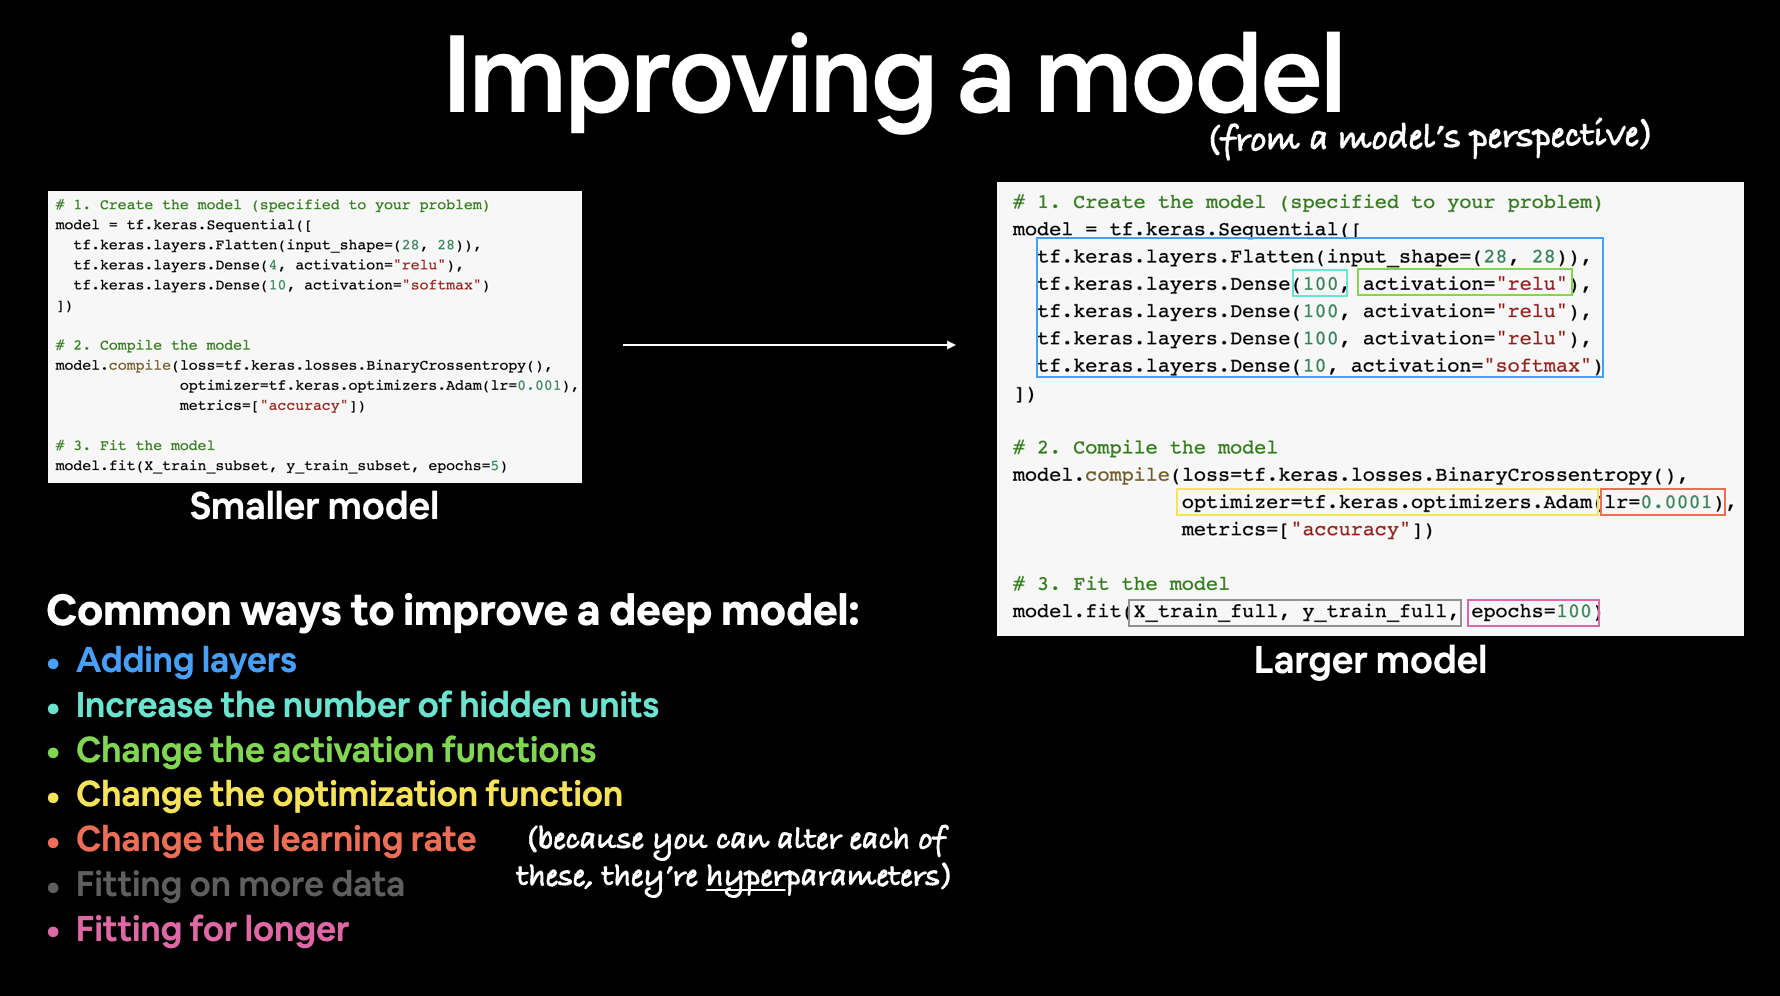

There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters) and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

In [20]:
# set the random seed
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),   
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4416 - loss: 1.2282   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4807 - loss: 0.7001 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4747 - loss: 0.7001 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4746 - loss: 0.7000 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4746 - loss: 0.7000 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4746 - loss: 0.7000 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4737 - loss: 0.6999 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4759 - loss: 0.6999 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4759 - loss: 0.6999 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4759 - loss: 0.6998 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4750 - loss: 0.6998 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [21]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4897 - loss: 0.6941 


[0.6935432553291321, 0.5130000114440918]

In [22]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
doing binary classifcation...


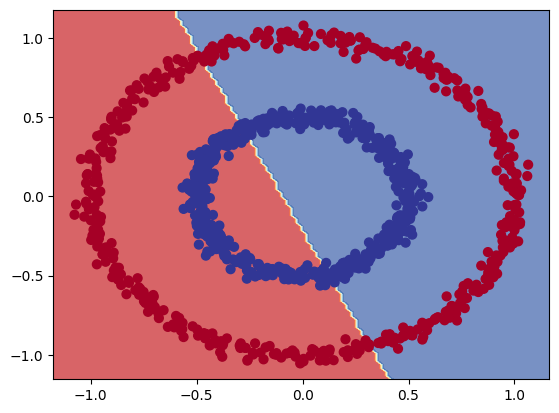

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

The missing piece: Non-linearity

In [24]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4160 - loss: 2.4534  
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4811 - loss: 0.7691 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4930 - loss: 0.7342 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5050 - loss: 0.7190 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5041 - loss: 0.7107 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5079 - loss: 0.7057 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5077 - loss: 0.7024 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5061 - loss: 0.7002 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5023 - loss: 0.6986 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4976 - loss: 0.6975 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4952 - loss: 0.6966 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step
doing binary classifcation...


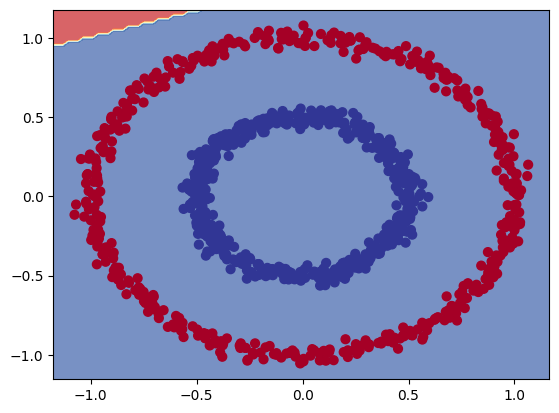

In [25]:
plot_decision_boundary(model_4, X, y)

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5120 - loss: 2.1923   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4796 - loss: 1.4698 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4303 - loss: 1.3639 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4081 - loss: 1.2962 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3998 - loss: 1.2451 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3945 - loss: 1.2039 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3874 - loss: 1.1694 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3851 - loss: 1.1397 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3851 - loss: 1.1131 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3848 - loss: 1.0890 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3827 - loss: 1.0661 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
doing binary classifcation...


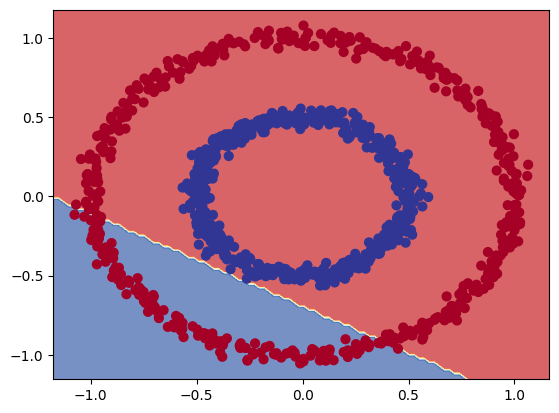

In [27]:
plot_decision_boundary(model_5, X, y)

In [28]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5122 - loss: 4.5517   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 2.9718 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 1.5366 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5122 - loss: 1.4097 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 1.3382 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 1.2789 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 1.2269 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 1.1804 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 1.1381 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 1.1002 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 1.0670 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step
doing binary classifcation...


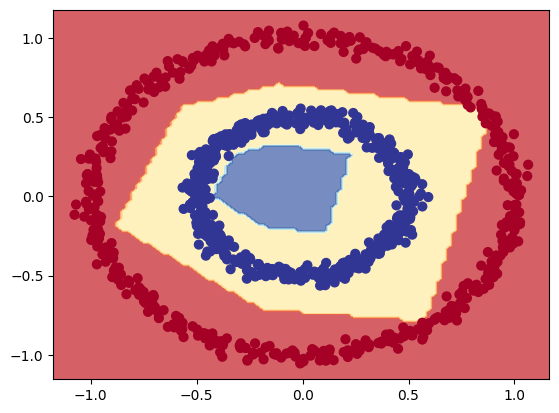

In [29]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

In [30]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
doing binary classifcation...


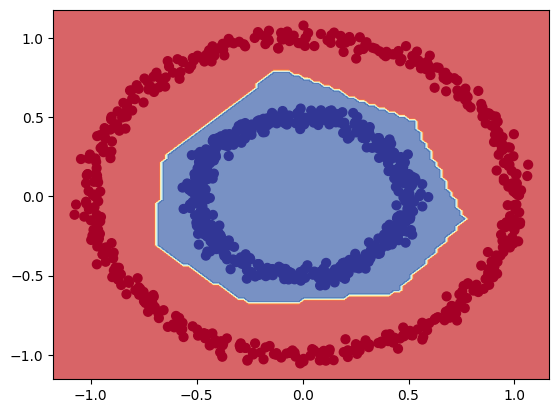

In [31]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [32]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

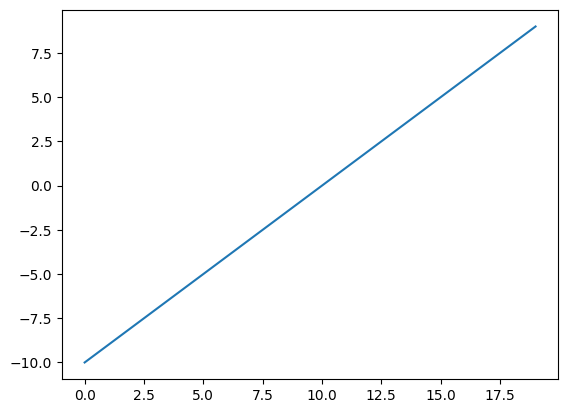

In [33]:
plt.plot(A)

In [34]:
def sigmoid(x):
    """
    Custom sigmoid activation function.
    """
    return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

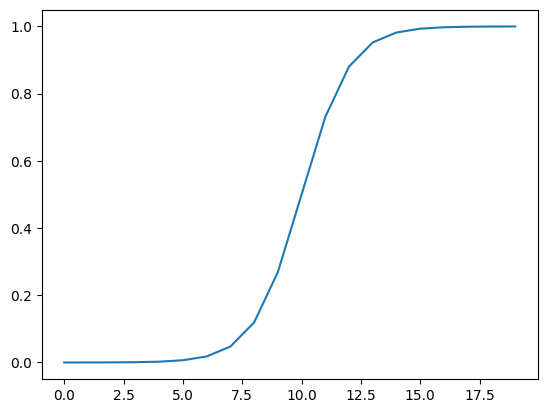

In [35]:
plt.plot(sigmoid(A))

In [36]:
def relu(x):
    return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

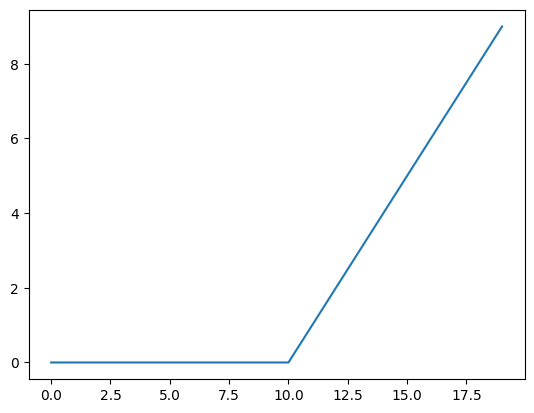

In [37]:
plt.plot(relu(A))

In [38]:
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397861e-05, 1.2339458e-04, 3.3535008e-04, 9.1105123e-04,
       2.4726230e-03, 6.6928524e-03, 1.7986210e-02, 4.7425866e-02,
       1.1920294e-01, 2.6894140e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

In [39]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [40]:
tf.keras.activations.relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

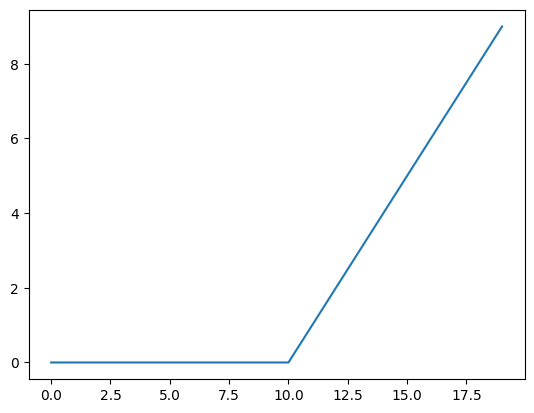

In [41]:
plt.plot(tf.keras.activations.relu(A))

Evaluating and improving our classification model

If you answered the question above, you might've picked up what we've been doing wrong.

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

In [42]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [43]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5374 - loss: 0.7208   
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5973 - loss: 0.6972 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6242 - loss: 0.6858 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6360 - loss: 0.6708 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6406 - loss: 0.6442 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6744 - loss: 0.6012 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7721 - loss: 0.5365 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8533 - loss: 0.4530 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9239 - loss: 0.3644 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9557 - loss: 0.2861 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9734 - loss: 0.2268 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

In [44]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0372 
Test loss: 0.0411, Test accuracy: 1.0000


100% accuracy

* The activation parameter - We used strings ("relu" & "sigmoid") instead of using library paths (tf.keras.activations.relu), in TensorFlow, they both offer the same functionality.
* The learning_rate (also lr) parameter - We increased the learning rate parameter in the Adam optimizer to 0.01 instead of 0.001 (an increase of 10x).
* You can think of the learning rate as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, there's such a thing as a too high learning rate, where a model tries to learn too fast and doesn't learn anything. We'll see a trick to find the ideal learning rate soon.
* The number of epochs - We lowered the number of epochs (using the epochs parameter) from 100 to 25 but our model still got an incredible result on both the training and test sets.
* One of the reasons our model performed well in even less epochs (remember a single epoch is the model trying to learn patterns in the data by looking at it once, so 25 epochs means the model gets 25 chances) than before is because we increased the learning rate.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
doing binary classifcation...


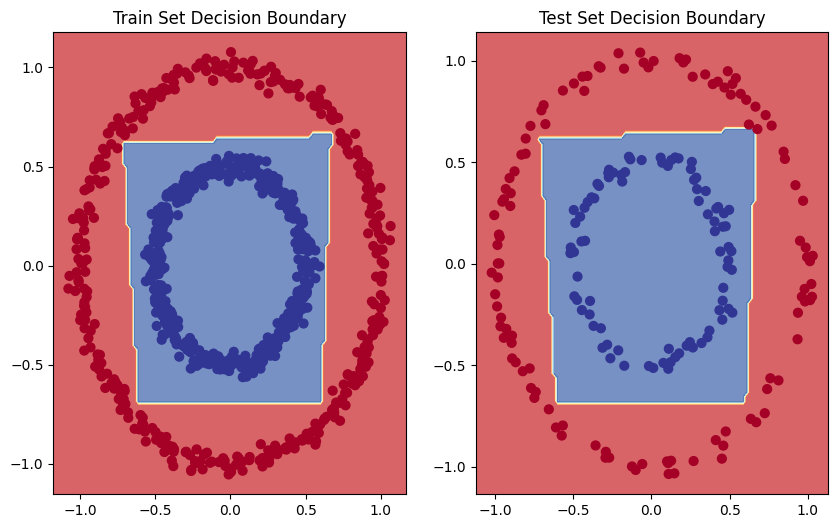

In [45]:
# plot the decision boundary of the model
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.title("Train Set Decision Boundary")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test Set Decision Boundary")
plot_decision_boundary(model_8, X_test, y_test)

Plot the loss curves

 the variable history when calling the fit() function on a model (fit() returns a History object)

In [46]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.55375,0.714784
1,0.61125,0.693287
2,0.62625,0.682607
3,0.63500,0.664012
4,0.64500,0.634713
5,0.69500,0.588156
6,0.80250,0.519630
7,0.87500,0.431995
8,0.93875,0.344393
9,0.96875,0.269417


Text(0.5, 1.0, 'Model 8 Loss Curves')

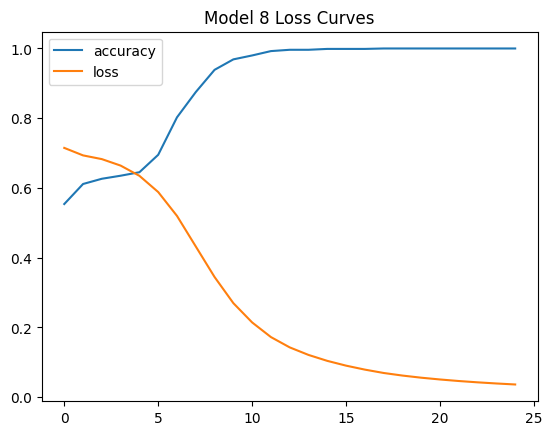

In [47]:
pd.DataFrame(history.history).plot()
plt.title("Model 8 Loss Curves")

Finding the best learning rate